In [23]:
import numpy as np

def kmeans(data, k, max_iter=100):
    n, m = data.shape
    centroids = data[np.random.choice(n, k, replace=False), :]
    print(centroids)
    clusters = [[] for _ in range(k)]
    for iteration in range(max_iter):
        for i in range(n):
            distances = np.linalg.norm(data[i, :] - centroids, axis=1)
            closest_centroid = np.argmin(distances)
            clusters[closest_centroid].append(i)
        for j in range(k):
            if clusters[j]:
                centroids[j, :] = np.mean(data[clusters[j], :], axis=0)
    return clusters, centroids



[[-0.575  2.     1.   ]
 [ 0.     2.     0.   ]]


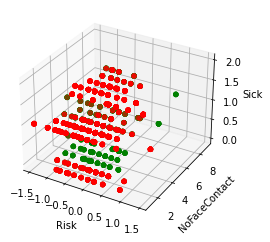

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Read the Flu dataset
df = pd.read_csv('flu_data.csv')
df.dropna(inplace=True)
colors = ['r','g','b','c','k','m','w','y',]
# Select the features for clustering
data = df[['Risk', 'NoFaceContact', 'Sick']].to_numpy()

# Apply k-means clustering with k = 2
clusters, centroids = kmeans(data, k=2,max_iter=10)

# Visualize the clusters
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i, cluster in enumerate(clusters):
    ax.scatter(data[cluster, 0], data[cluster, 1], data[cluster, 2], c=colors[i])
ax.set_xlabel('Risk')
ax.set_ylabel('NoFaceContact')
ax.set_zlabel('Sick')
plt.show()


[[0.    3.    1.   ]
 [1.074 1.    2.   ]]


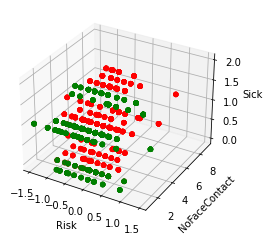

[[ 0.169  2.     1.   ]
 [ 0.     5.     0.   ]
 [-0.345  2.     1.   ]]


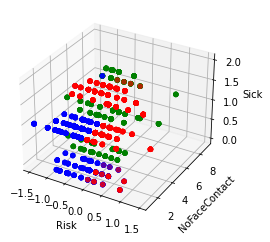

[[ 0.169  3.     1.   ]
 [-0.197  5.     2.   ]
 [-0.575  2.     1.   ]
 [-1.453  5.     1.   ]]


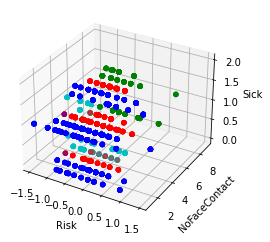

[[-0.376  2.     1.   ]
 [-1.074  1.     1.   ]
 [ 0.     1.     1.   ]
 [-0.376  1.     1.   ]
 [ 0.169  4.     2.   ]]


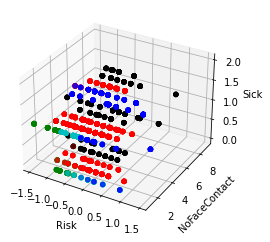

[[-0.575  1.     1.   ]
 [ 0.     2.     0.   ]
 [ 0.     4.     2.   ]
 [-1.074  1.     1.   ]
 [-0.575  2.     1.   ]
 [ 0.169  2.     1.   ]]


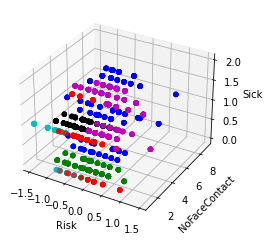

[[-0.864  4.     0.   ]
 [-0.169  2.     1.   ]
 [ 0.169  2.     1.   ]
 [-0.169  5.     2.   ]
 [-0.376  3.     1.   ]
 [-0.345  1.     1.   ]
 [-0.532  1.     0.   ]]


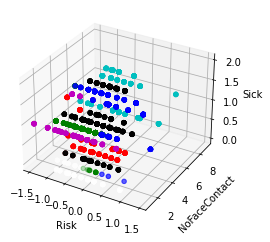

[[-0.169  2.     2.   ]
 [-0.169  5.     2.   ]
 [ 0.     2.     2.   ]
 [ 0.575  2.     2.   ]
 [-0.523  3.     1.   ]
 [-0.376  1.     1.   ]
 [ 0.169  1.     0.   ]
 [ 0.197  3.     2.   ]]


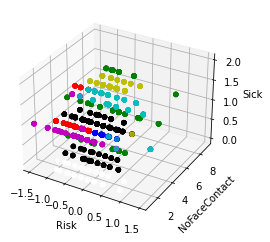

[[-1.074  2.     1.   ]
 [-1.074  2.     0.   ]
 [-0.231  1.     1.   ]
 [-0.575  2.     1.   ]
 [-1.453  1.     1.   ]
 [ 0.     3.     2.   ]
 [-0.345  4.     0.   ]
 [ 0.169  3.     1.   ]
 [-0.864  1.     1.   ]]


<ipython-input-28-f458c580327b>:19: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  ax.scatter(data[cluster, 0], data[cluster, 1], data[cluster, 2], c=colors[i])


ValueError: 'c' argument has 2 elements, which is inconsistent with 'x' and 'y' with size 153.

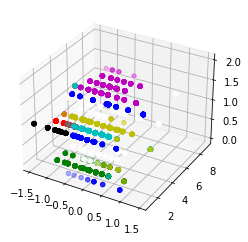

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Read the Flu dataset
df = pd.read_csv('flu_data.csv')
df.dropna(inplace=True)
colors = ['r','g','b','c','k','m','w','y','br','v']
# Select the features for clustering
data = df[['Risk', 'NoFaceContact', 'Sick']].to_numpy()
for j in range(2,10):
    # Apply k-means clustering with k = 2
    clusters, centroids = kmeans(data, k=j,max_iter=10)

    # Visualize the clusters
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for i, cluster in enumerate(clusters):
        ax.scatter(data[cluster, 0], data[cluster, 1], data[cluster, 2], c=colors[i])
    ax.set_xlabel('Risk')
    ax.set_ylabel('NoFaceContact')
    ax.set_zlabel('Sick')
    plt.show()

In [6]:
def calcDunnIndex(points, cluster):

    # points -- all data points
    # cluster -- cluster centroids

    
    numer = float('inf')
    for c in cluster: # for each cluster
        for t in cluster: # for each cluster
           # print(t, c)
            if (t == c).all(): continue # if same cluster, ignore
            ndis = findDistance(t, c)
            numer = numer if numer < ndis else ndis # find distance between centroids
            
    denom = 0
    for c in cluster: # for each cluster
        for p in points: # for each point
            for t in points: # for each point
                if (t == p).all(): continue # if same point, ignore
                ddis = findDistance(t, p)
            #    print('Denominator', denominator, ddis)
                denom = denom if denom > ddis else ddis
                
    return numer/denom


In [7]:
def findDistance(point1, point2):
    
    eucDis = 0
    for i in range(len(point1)):
        eucDis = eucDis + (point1[i] - point2[i])**2
 
    return eucDis**0.5 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.distance import cdist
# Read the Flu dataset
df = pd.read_csv('flu_data.csv')
df.dropna(inplace=True)
colors = ['r','g','b','c','k','m','w','y',]
# Select the features for clustering
data = df[['Risk', 'NoFaceContact', 'Sick']].to_numpy()

# Apply k-means clustering with k = 2
clusters, centroids = kmeans(data, k=6,max_iter=10)
di=calcDunnIndex(data,centroids)
print(di)


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.distance import cdist
# Read the Flu dataset
df = pd.read_csv('flu_data.csv')
df.dropna(inplace=True)
colors = ['r','g','b','c','k','m','w','y',]
# Select the features for clustering
data = df[['Risk', 'NoFaceContact', 'Sick','HndWshFreq']].to_numpy()

# Apply k-means clustering with k = 2
clusters, centroids = kmeans(data, k=2,max_iter=1000)
di=calcDunnIndex(data,centroids)
print(di)


[[-0.523  5.     1.     3.   ]
 [ 0.     2.     0.     4.   ]]
0.3063112066398558


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.distance import cdist
# Read the Flu dataset
df = pd.read_csv('flu_data.csv')
df.dropna(inplace=True)
colors = ['r','g','b','c','k','m','w','y',]
# Select the features for clustering
data = df[['Risk', 'NoFaceContact', 'Sick','HndWshFreq','HndWshQual']].to_numpy()

# Apply k-means clustering with k = 2
clusters, centroids = kmeans(data, k=5,max_iter=10)
di=calcDunnIndex(data,centroids)
print(di)


[[ 0.197  3.     1.     2.     4.   ]
 [ 0.     1.     1.     3.     3.   ]
 [-0.231  4.     2.     1.     3.   ]
 [ 0.181  3.     2.     2.     4.   ]
 [-0.345  2.     0.     2.     2.   ]]
0.15658710089338698


In [ ]:
def fuzzy_cmeans(data, k, m, max_iter=100):
    """
    Fuzzy C-means clustering algorithm.
    
    Parameters:
    - data: numpy array with the data points (n x m)
    - k: number of clusters
    - m: fuzziness parameter
    - max_iter: maximum number of iterations
    
    Returns:
    - clusters: numpy array with the fuzzy membership of each point to each cluster (n x k)
    - centroids: numpy array with the k cluster centroids (k x m)
    """
    n, _ = data.shape
    # Initialize centroids randomly
    centroids = data[np.random.choice(n, k, replace=False), :]
    # Initialize fuzzy membership randomly
    membership = np.random.rand(n, k)
    membership /= np.sum(membership, axis=1, keepdims=True)
    for _ in range(max_iter):
        # Update centroids
        for j in range(k):
            centroids[j, :] = np.sum(membership[:, j, np.newaxis] * data, axis=0) / np.sum(membership[:, j])
        # Update fuzzy membership
        for i in range(n):
            distances = np.linalg.norm(data[i, :] - centroids, axis=1)
            for j in range(k):
                membership[i, j] = 1 / np.sum((distances / distances[j]) ** (2 / (m - 1)))
    return membership, centroids